In [1]:
#Try better

In [2]:
#Import Necessary Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import keras 

#Initialize Neural Network as Sequential Network
from keras.models import Sequential

from keras.models import model_from_json
#Images are 2D arrays, so import Conv2D. If videos, import 3D with time as the third dimension
from keras.layers import Convolution2D

#Import Max Pooling because we need the highest value pixel from the area of interest
from keras.layers import MaxPooling2D

#Convert 2D arrays into a singular vector
from keras.layers import Flatten

#Perform full connection of neural network
from keras.layers import Dense

#Include random dropout nodes
from keras.layers import Dropout

#import image data generator library
from keras.preprocessing.image import ImageDataGenerator

#Image prepreprocessing
from keras.preprocessing import image

/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ec2-user/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ec2-user/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))
/home/ec2-user/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
#Quick EDA

In [4]:
#How many count of each class in each folder?
pandas_train_count = len(os.listdir('animal_dataset/training_set/panda/'))
print('panda train pics: ' + str(pandas_train_count))
not_pandas_train_count = len(os.listdir('animal_dataset/training_set/not_panda/'))
print('not panda train pics: ' + str(not_pandas_train_count))
pandas_val_count = len(os.listdir('animal_dataset/val_set/panda/'))
print('panda val pics: ' + str(pandas_val_count))
not_pandas_val_count = len(os.listdir('animal_dataset/val_set/not_panda/'))
print('not panda val pics: ' + str(not_pandas_val_count))

panda train pics: 1079
not panda train pics: 1116
panda val pics: 277
not panda val pics: 352


In [5]:
train_class_imbalance = pandas_train_count/(pandas_train_count+not_pandas_train_count)
train_class_imbalance

0.49157175398633257

In [6]:
#Multiple Convolutional CNN with dropout

In [7]:
classifier2 = Sequential()
#32 feature detectors of 3 by 3 dimensions, to create 32 feature maps
classifier2.add(Convolution2D(32,(3,3), input_shape=(64,64,3), activation='relu'))
#Pooling size 2 by 2, pick the largest value pixel
classifier2.add(MaxPooling2D(pool_size=(2,2)))
#Add second convolution
classifier2.add(Convolution2D(32,(3,3), input_shape=(64,64,3), activation='relu'))
#Pooling of second convolutional layer
classifier2.add(MaxPooling2D(pool_size=(2,2)))
#Add third convolution with 64 feature extractors
classifier2.add(Convolution2D(64,(3,3), input_shape=(64,64,3), activation='relu'))
#Pooling of second convolutional layer
classifier2.add(MaxPooling2D(pool_size=(3,3)))
#Flatten to feed into ANN
classifier2.add(Flatten())
#128 hidden nodes in the hidden layer
classifier2.add(Dense(units = 128, activation='relu'))
# classifier2.add(Dropout(0.5))
classifier2.add(Dense(units = 1, activation='sigmoid'))
classifier2.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [6]:
#rescale all pixel values between 0 and 1
#shear range to apply random tranvections, keep default
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range = 0.2, horizontal_flip=True)
#rescale test dataset too
test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory('animal_dataset/training_set/',
                                                target_size = (64,64),
                                                batch_size = 32, 
                                                class_mode = 'binary')
test_set = test_datagen.flow_from_directory('animal_dataset/val_set/',
                                           target_size = (64, 64),
                                           batch_size = 32,
                                           class_mode = 'binary')

Found 2177 images belonging to 2 classes.
Found 622 images belonging to 2 classes.


In [9]:
classifier2.fit_generator(training_set,
                   steps_per_epoch = 3179,
                   nb_epoch = 10,
                   validation_data = test_set,
                   nb_val_samples = 816)

/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., steps_per_epoch=3179, validation_data=<keras.pre..., epochs=10, validation_steps=816)`
  """


Epoch 1/10
  16/3179 [..............................] - ETA: 16:27 - loss: 0.7036 - acc: 0.5410

/home/ec2-user/anaconda3/lib/python3.6/site-packages/PIL/Image.py:916: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


3179/3179 [==============================] - 1218s 383ms/step - loss: 0.0950 - acc: 0.9616 - val_loss: 0.2564 - val_acc: 0.9343
Epoch 2/10
3179/3179 [==============================] - 1216s 383ms/step - loss: 0.0146 - acc: 0.9951 - val_loss: 0.1633 - val_acc: 0.9598
Epoch 3/10
3179/3179 [==============================] - 1217s 383ms/step - loss: 0.0083 - acc: 0.9972 - val_loss: 0.1109 - val_acc: 0.9759
Epoch 4/10
3179/3179 [==============================] - 1216s 383ms/step - loss: 0.0059 - acc: 0.9979 - val_loss: 0.1229 - val_acc: 0.9743
Epoch 5/10
3179/3179 [==============================] - 1215s 382ms/step - loss: 0.0051 - acc: 0.9983 - val_loss: 0.1624 - val_acc: 0.9629
Epoch 6/10
3179/3179 [==============================] - 1218s 383ms/step - loss: 0.0054 - acc: 0.9985 - val_loss: 0.1722 - val_acc: 0.9663
Epoch 7/10
3179/3179 [==============================] - 1215s 382ms/step - loss: 0.0035 - acc: 0.9988 - val_loss: 0.2566 - val_acc: 0.9550
Epoch 8/10
3179/3179 [================

Saved model to disk


In [10]:
#Double check accuracy
not_panda = 0
i = 0
count = 0
for x in os.listdir('animal_dataset/training_set/not_panda/'):
    count += 1
    if x != '.DS_Store':
        image_path = 'animal_dataset/training_set/not_panda/' + x
        test_image = image.load_img(image_path, target_size=(64,64))
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis=0)
        result = loaded_model.predict(test_image)

        if result[0][0] == 1:
            prediction = 'panda'
        elif result[0][0] == 0:
            prediction = 'not panda'
            not_panda += 1
            i += 1
print('count')
print(count)
print('not pandas')
print(not_panda)

count
1116
not pandas
597


In [8]:

# load json and create model
json_file = open('classifier2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("classifier2.h5")
print("Loaded model from disk")

Loaded model from disk


In [9]:
#Double check accuracy
not_panda = 0
i = 0
count = 0
for x in os.listdir('animal_dataset/training_set/not_panda/'):
    count += 1
    if x != '.DS_Store':
        image_path = 'animal_dataset/training_set/not_panda/' + x
        test_image = image.load_img(image_path, target_size=(64,64))
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis=0)
        result = loaded_model.predict(test_image)

        if result[0][0] == 1:
            prediction = 'panda'
        elif result[0][0] == 0:
            prediction = 'not panda'
            not_panda += 1
            i += 1
print('count')
print(count)
print('not pandas')
print(not_panda)

count
1116
not pandas
597


In [14]:
# serialize model to JSON
model_json = classifier2.to_json()
with open("classifier2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
classifier2.save_weights("classifier2.h5")
print("Saved model to disk")

Saved model to disk


In [27]:
# serialize model to JSON
model_json = classifier2.to_json()
with open("classifier2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
classifier2.save_weights("classifier2.h5")
print("Saved model to disk")

Saved model to disk


In [4]:

# load json and create model
json_file = open('classifier2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("classifier2.h5")
print("Loaded model from disk")

Loaded model from disk


In [31]:
loaded_model.predict(test_image)

array([[0.]], dtype=float32)

'panda'

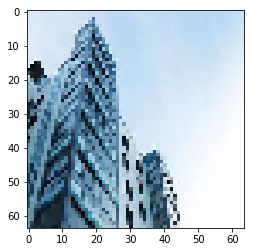

In [12]:
test_image = image.load_img('animal_dataset/prediction_set/building.jpeg', target_size=(64,64))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = loaded_model.predict(test_image)
if result[0][0] == 1:
    prediction = 'panda'
else:
    prediction = 'not panda'
prediction

'not panda'

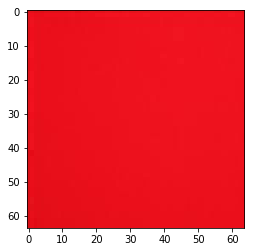

In [11]:
test_image = image.load_img('animal_dataset/prediction_set/red.jpeg', target_size=(64,64))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = loaded_model.predict(test_image)
if result[0][0] == 1:
    prediction = 'panda'
elif result[0][0] == 0:
    prediction = 'not panda'
prediction

'not panda'

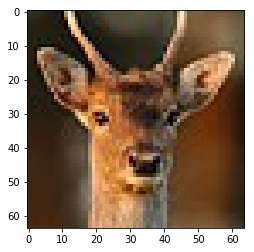

In [23]:
test_image = image.load_img('animal_dataset/training_set/not_panda/Fallow-Deer-50.jpg', target_size=(64,64))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = loaded_model.predict(test_image)
if result[0][0] == 1:
    prediction = 'panda'
elif result[0][0] == 0:
    prediction = 'not panda'
prediction